# 3.6.2: Penny Falling Redux

---

<br>

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---

In the previous chapter we simulated a penny falling in a vacuum, that
is, without air resistance. But the computational framework we used is
very general; it is relatively uncomplicated to add additional forces, including drag.  In this chapter, we'll do just that!

## The Physics of Drag

### The drag force equation

As an object moves through a fluid, like air, the object applies force
to the air and, in accordance with the third law of motion, the air applies an equal and opposite force to the object.

<br>

Drag is a "reactive force", which means that it always acts in the direction opposite to the direction of
travel.  Unlike friction, its magnitude is dependent on the velocity, and can be calculated using the drag equation:

$$F_d = \frac{1}{2}~\rho~v^2~C_d~A$$

where

-   $F_d$ is force due to drag, in newtons ($N$).

-   $\rho$ is the density of the fluid in $kg/m^3$.

-   $v$ is the magnitude of velocity in $m/s$.

-   $A$ is the the *projected frontal area* of the object in $m^2$. You can think of this as the visible area of the object as seen from a point on its line of travel.  So a falling cylinder might have an $A$ in the shape of a circle or a rectangle, depending on its orientation as it falls.

-   $C_d$ is the *drag coefficient*, a dimensionless quantity that depends on the shape of the object (including length but not frontal area), its surface properties, and how it interacts with the fluid.

<br>

Of course, the drag equation is itself a model, based on the assumption that $C_d$ does not depend on the other terms in the equation: density, velocity, and area. If the object is moving very fast, or spinning, or if $C_D$ depends on velocity or density, the model can be less effective.

---

<br>

🟨 🟨 Active Reading: Matching (Submit "Definition" letters in order of "Terms", separated by a space)



In [8]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve

location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Support_files/'
name = 'Embedded_Qs.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name

#@title { form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data, number = display_match('3_6_2nd_order', home,2)
answer = "" #@param {type:"string"}
a = answer.split(sep=" ")
check_match(data,a, number)


Which of the following would likely to be larger on a minivan on the highway than on a 200 mph race car?

Terms

1) Fluid density
2) Velocity
3) Projected Frontal Area
4) Drag Coefficient

Definitions

A) Higher on the minivan
B) Higher on the race car
C) Same for both


---

<br>

🟨 🟨 Active reading: Multiple choice


In [7]:
#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('3_6_2nd_order',home,3)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)


Would the drag force likely be higher on a minivan on the highway or a 200 mph race car?

A) Minivan
B) Race car


---

### Determining a drag coefficient

For objects moving at moderate speeds through air, typical drag
coefficients are between 0.1 and 1.0, with blunt objects at the high end of the range and streamlined objects at the low end.

<br>

<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/3_6/Drag_coef.PNG width = 500>

<br>

For simple geometric objects we can sometimes guess the drag coefficient with reasonable accuracy; for more complex objects we usually have to take measurements and estimate $C_d$ from data.

<br>

Since a falling penny would likely be rotating unpredictably, we should use measurements to estimate $C_d$. In particular, we can measure *terminal velocity*, $v_{term}$, which is
the speed where drag halts the objects' acceleration.  If we know this terminal velocity, we can use the second law of motion to find $C_d$, by naming our two forces (gravity and drag) setting the acceleration to 0:

<br>

$$\Sigma F = ma \qquad \rightarrow \qquad F_{drag} + F_{grav} =0$$

<br>

This leads to:

<br>

$$F_{drag} = - F_{grav}$$

<br>

$$\frac{1}{2}~\rho~v_{terminal}^2~C_d~A = - m g$$

<br>

where $m$ is the mass of the object and $g$ is acceleration due to gravity. Solving this equation for $C_d$ yields:

<br>

$$C_d = \frac{2~m g}{\rho~v_{terminal}^2~A}$$

<br>

In our earlier notebook, we estimated that the terminal velocity of a penny is between 35 and 65 mph (15-30 m/s).  In our first notebooks, we set the terminal velocity to 29 m/s, so let's use that here too:

In [9]:
import numpy as np

v_term = 29.0         # terminal velocity, 29 m/s
rho = 1.2           # density of air, kg/m^3
g = 9.81            # gravity, m/s^2
mass = 0.0025       # mass, kg
diameter = 0.019    # diameter, m
area = np.pi * (diameter/2)**2
C_d = (2.0*mass*g)/(rho*v_term**2*area)
C_d

0.1714212614288154

The density of air depends on temperature, barometric pressure (which depends on
altitude), and humidity, among other things.  This value might be typical in New York City at 20 °C.   Our $C_d$ with these parameters is about $0.17$.



---

<br>

🟨 🟨 Active reading: Multiple choice


In [6]:
#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('3_6_2nd_order',home,4)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)


If two objects A and B have the same mass and same cross sectional area, but A falls at a higher terminal velocity, which has the larger coefficient of drag?

A) Object A
B) Object B


---

<br>

🟨 🟨 Active reading: Multiple choice


In [ ]:
#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('3_6_2nd_order',home,5)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)


---

## Implementing the Drag Model

### Defining parameters and a system

First, lay out our parameters:


In [39]:
# Physical parameters
v_term = 29.0       # m/s
v_init = 0          # m/s
rho = 1.2           # kg/m3
g = 9.81            # m/s2
mass = 0.0025       # kg
diameter = 0.019    # m
height = 381        # m

# Simulation parameters
dt = 0.01           # s
t_end = 30          # s

And make the system and state.  We'll calculate `area` and `C_d` directly when we create the objects to make it easier to adjust our parameters and create new systems:

In [40]:
state = pd.Series(dict(y=height, v=v_init))
system = dict(area = np.pi * (diameter/2)**2 ,
              C_d = (2.0*mass*g)/(rho*v_term**2*area),
              rho=rho, g=g, v_term = v_term,
                  mass=mass, t_end=t_end, dt = dt)


Now if we need to create a new system (say, with a different terminal velocity assumption), we can simply update `v_term` and create a new system with the same line of code:

In [17]:
v_term = 20.0
system1 = dict(area = np.pi * (diameter/2)**2 ,
              C_d = (2.0*mass*g)/(rho*v_term**2*area),
              rho=rho, g=g, v_term = v_term,
                  mass=mass, t_end=t_end, dt = dt)

# Print out the different drag coefficients
print(system['C_d'], system1['C_d'])

0.1714212614288154 0.3604132021540844


If the terminal velocity of the penny is 20 m/s, rather than 29 m/s, that implies that the coefficient of drag is 0.36, rather than 0.17.
And that makes sense, since the lower terminal velocity implies more drag.

### Defining the Change Function

Since the drag force depends on velocity, we will not have a constant acceleration at each time step.  Instead, we'll need to use the second law to calculate the drag force at each time step, and use that to define the acceleration that results from drag.

In [19]:
def change_func(t, state, system):
    # Comment 1
    y, v = state
    rho, C_d, area = system['rho'], system['C_d'], system['area']
    mass, g, dt = system['mass'], system['g'], system['dt']

    # Comment 2
    f_drag = rho * v**2 * C_d * area / 2

    # Comment 3
    if v < 0:
        a_drag = f_drag / mass
    else:
        a_drag = -f_drag / mass

    # Comment 4
    dydt = v
    dvdt = -g + a_drag

    # Comment 5
    y = y + dydt*dt
    v = v + dvdt*dt

    return pd.Series(dict(y=y, v=v))

`f_drag` is force due to drag, based on the drag equation, and `a_drag` is
acceleration due to drag, based on the second law.

<br>

To compute total acceleration, we add accelerations due to gravity and
drag. Notice that the signs of `g` and `a_drag` indicate their directions. As usual, let's test the slope function with the initial conditions.

In [31]:
state = change_func(0, state, system)
state

y    380.964688
v     -0.882671
dtype: float64

If you run the cell above multiple times, you should see the position and velocity of the penny changing.

---

<br>

🟨 🟨 Active Reading

Add inline comments (#) for `change_func` above where prompted.

### Running the simulation

Note that we have only added a couple items to the System object and altered `change_func`: so our code should still run with the `run_simulation` from the previous notebook:

In [33]:
def run_simulation(system, state, change_func):
    # Define the time steps
    t_array = np.arange(0, system['t_end']+1, system['dt'])
    n = len(t_array)

    # Set up a DataFrame to store the our state variables
    results = pd.DataFrame(index=t_array, columns=state.index,
                        dtype=np.float64)
    results.iloc[0] = state

    for i in range(n-1):
        t = t_array[i]
        state = change_func(t, state, system)
        results.iloc[i+1] = state
        # Test to see if the penny has hit the ground
        if state.y <= 0.0:
            results = results.dropna()
            return results

    return results

Now we can run the simulation like this:

In [34]:
results = run_simulation(system, state, change_func)

Here are the last few time steps:

In [35]:
results.tail()

,y,v
15.06,1.125881,-28.998010
15.07,0.835900,-28.998023
15.08,0.545920,-28.998037
15.09,0.255940,-28.998050
15.10,-0.034041,-28.998063


The final height is close to 0, as expected.  Interestingly, the final velocity is not exactly terminal velocity, which is a reminder that the simulation results are only approximate. We can get the flight time from `results`.

In [36]:
t_sidewalk = results.index[-1]
t_sidewalk

15.1

With air resistance, it takes about 15 seconds for the penny to reach the sidewalk.  Here's a plot of position as a function of time.

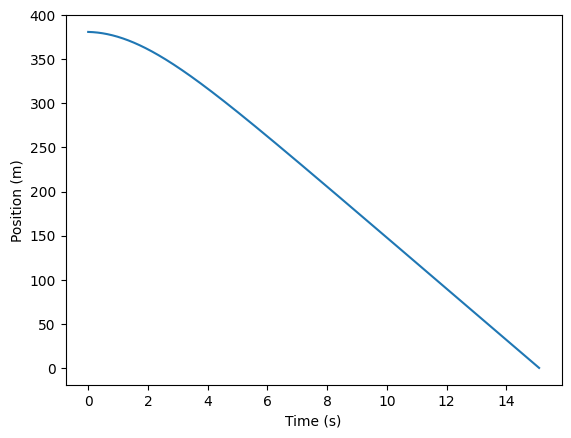

In [37]:
results.y.plot(xlabel='Time (s)',
         ylabel='Position (m)');



And velocity as a function of time:

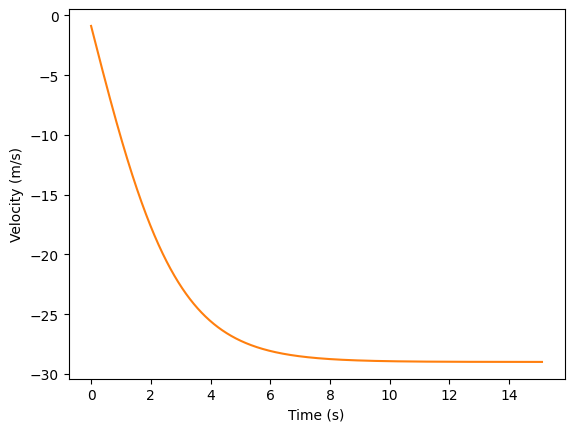

In [38]:
results.v.plot(color='C1', label='v',
                   xlabel='Time (s)',
                   ylabel='Velocity (m/s)');

From an initial velocity of 0, the penny accelerates downward until it reaches terminal velocity; after that, velocity is constant.

---

<br>

🟨 🟨 Active reading: Multiple choice


In [48]:
#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('3_6_2nd_order',home,6)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)


The position plot is mostly linear.  But in the previous notebook (without drag), the position plot was parabolic.  What causes the difference?

A) When we include drag, velocity is constant for much of the fall
B) When we include drag, acceleration is constant for much of the fall
C) When we include drag, position is constant for much of the fall


---

## Exercises

---

<br>

🟨 🟨

### Exercise 1

What happens to the simulation, if we throw the penny up or down rather than just dropping it?

<br>

Create a couple new state objects, and run the simulation with 1) an upward velocity and 2) downward initial velocity that exceeds the penny's terminal velocity (say, -40 m/s).

<br>

What do you expect to happen?  Plot velocity and position as a function of time, and see if they are consistent with your prediction.  

In [41]:
# Create 2 new state objects for two new simulations


In [42]:
# Use run_simulation to get the results for the "throwing downward" simulation


In [43]:
# Use run_simulation to get the results for the "throwing upward" simulation


In [ ]:
# Plot the position vs. time for all three simulations


In [ ]:
# Plot the velocity vs. time for all three simulations


---

<br>

🟨 🟨

### Exercise 2

✅ A. What effect does throwing the ball downward have on the total time required for the drop?  Use numbers in your explanation.

✅ ✅  Answer A here.

<br>

✅ B.  What happens to the velocity of the ball that is thrown downward over time?

✅ ✅  Answer B here

<br>

✅ C. In the downward-thrown model, in the first seconds, what is the relationship between the drag force and gravitational force?  Which is bigger?  What direction are each in?  How do they change over time?

✅ ✅ Answer C here.